ðŸ”¹ InformaciÃ³n sobre los datasets:

ðŸ“‚ Usuarios:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

DescripciÃ³n estadÃ­stica:
            user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000

ðŸ“‚ Llamadas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 ent

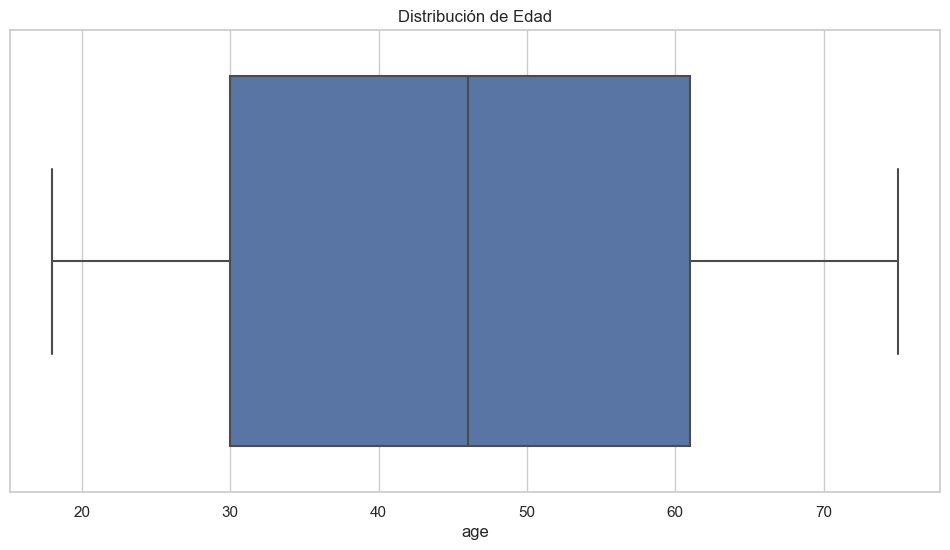

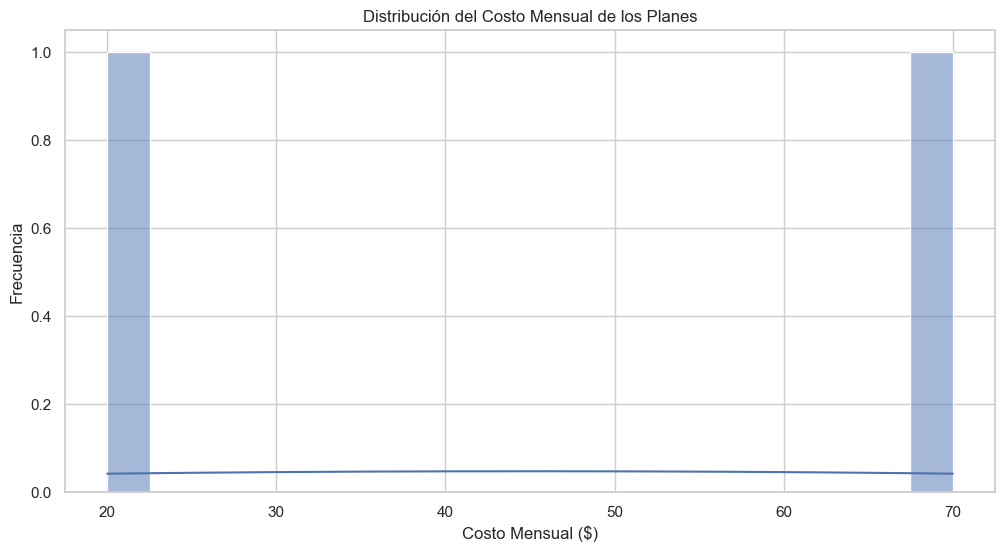

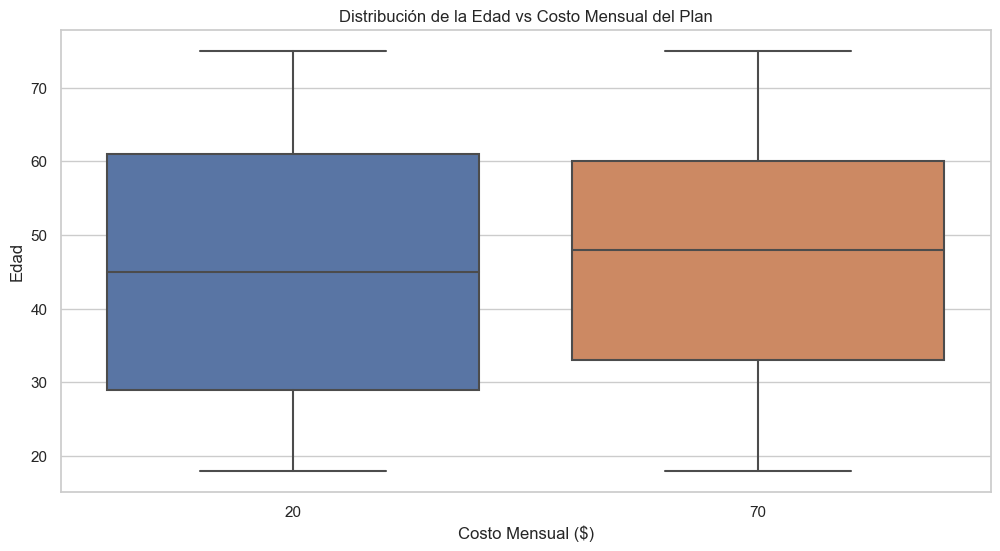

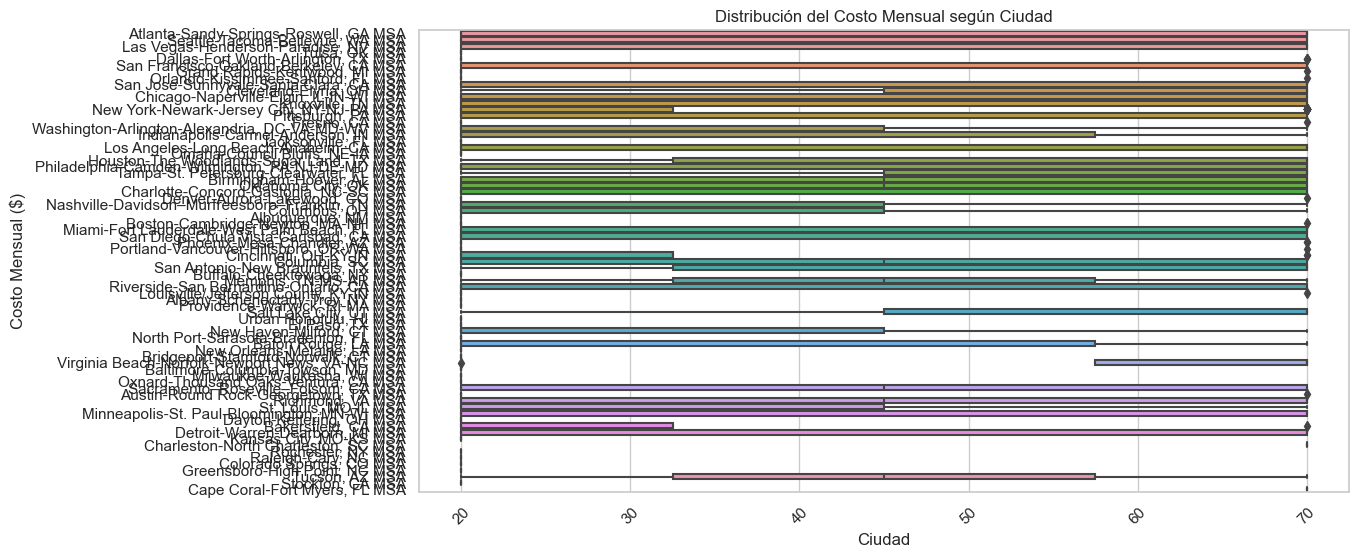


âœ… AnÃ¡lisis Exploratorio de Datos (EDA) corregido y completado.


In [1]:
# ðŸ“Œ Importar librerÃ­as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ðŸ“Œ ConfiguraciÃ³n de visualizaciÃ³n
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ðŸ“Œ Ruta de los archivos CSV en la carpeta "raw"
raw_path = "C:/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Examanes/Proyecto_Megaline/data/raw/"

# ðŸ“Œ Cargar los datasets
df_users = pd.read_csv(raw_path + "megaline_users.csv")
df_calls = pd.read_csv(raw_path + "megaline_calls.csv")
df_sms = pd.read_csv(raw_path + "megaline_messages.csv")
df_internet = pd.read_csv(raw_path + "megaline_internet.csv")
df_plans = pd.read_csv(raw_path + "megaline_plans.csv")

# ðŸ“Œ Revisar la estructura de los datos
print("ðŸ”¹ InformaciÃ³n sobre los datasets:")
for name, df in zip(["Usuarios", "Llamadas", "SMS", "Internet", "Planes"], [df_users, df_calls, df_sms, df_internet, df_plans]):
    print(f"\nðŸ“‚ {name}:\n")
    print(df.info())
    print("\nDescripciÃ³n estadÃ­stica:\n", df.describe())

# ðŸ“Œ Valores nulos
print("\nðŸ”¹ Valores nulos por dataset:")
for name, df in zip(["Usuarios", "Llamadas", "SMS", "Internet", "Planes"], [df_users, df_calls, df_sms, df_internet, df_plans]):
    print(f"\nðŸ“‚ {name}:\n", df.isnull().sum())

# ðŸ“Œ AnÃ¡lisis de valores Ãºnicos en variables categÃ³ricas clave
if "plan" in df_users.columns:
    print("\nðŸ“‚ Usuarios - Planes disponibles:\n", df_users["plan"].value_counts())
if "city" in df_users.columns:
    print("\nðŸ“‚ Usuarios - Ciudades disponibles:\n", df_users["city"].value_counts())

# ðŸ“Œ Outliers: Boxplots para variables numÃ©ricas
plt.figure()
sns.boxplot(x=df_users["age"])
plt.title("DistribuciÃ³n de Edad")
plt.show()

# ðŸ“Œ DistribuciÃ³n del costo mensual de los planes
plt.figure()
sns.histplot(df_plans["usd_monthly_pay"], bins=20, kde=True)
plt.title("DistribuciÃ³n del Costo Mensual de los Planes")
plt.xlabel("Costo Mensual ($)")
plt.ylabel("Frecuencia")
plt.show()

# ðŸ“Œ RelaciÃ³n entre la edad y el costo del plan
df_users_plans = df_users.merge(df_plans, left_on="plan", right_on="plan_name", how="left")

plt.figure()
sns.boxplot(x=df_users_plans["usd_monthly_pay"], y=df_users_plans["age"])
plt.title("DistribuciÃ³n de la Edad vs Costo Mensual del Plan")
plt.xlabel("Costo Mensual ($)")
plt.ylabel("Edad")
plt.show()

# ðŸ“Œ RelaciÃ³n entre gÃ©nero y costo del plan
plt.figure()
sns.boxplot(x=df_users_plans["usd_monthly_pay"], y=df_users_plans["city"])
plt.xticks(rotation=45)
plt.title("DistribuciÃ³n del Costo Mensual segÃºn Ciudad")
plt.xlabel("Ciudad")
plt.ylabel("Costo Mensual ($)")
plt.show()


print("\nâœ… AnÃ¡lisis Exploratorio de Datos (EDA) corregido y completado.")


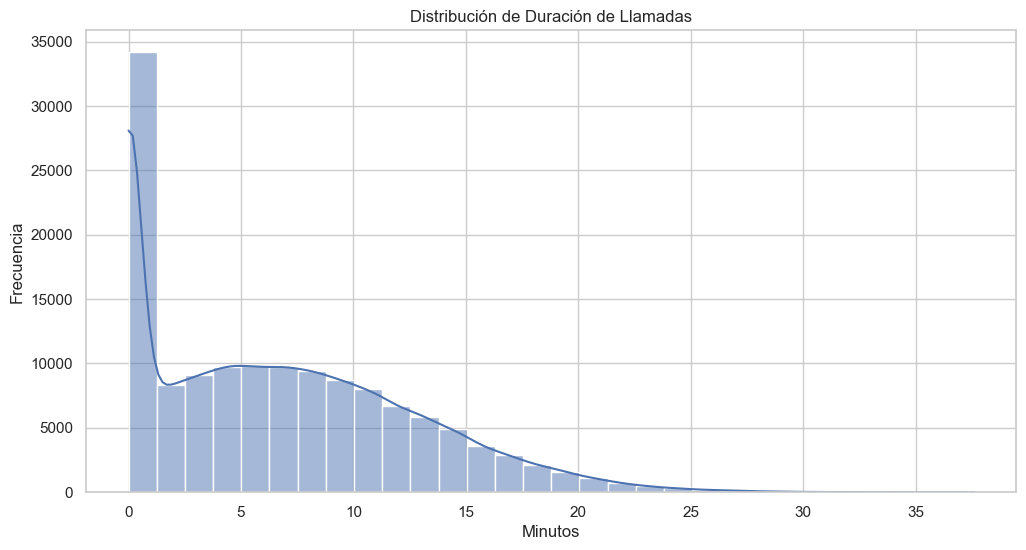

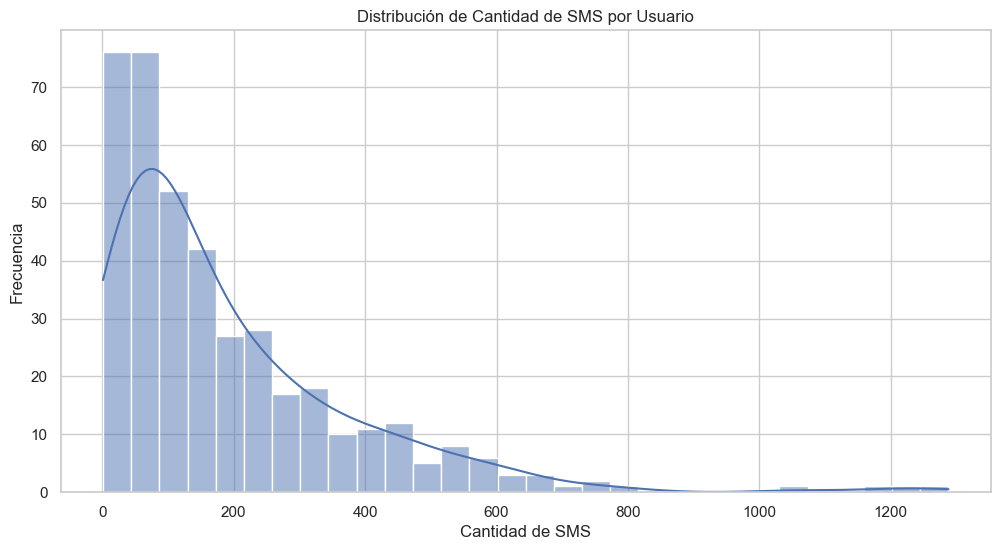

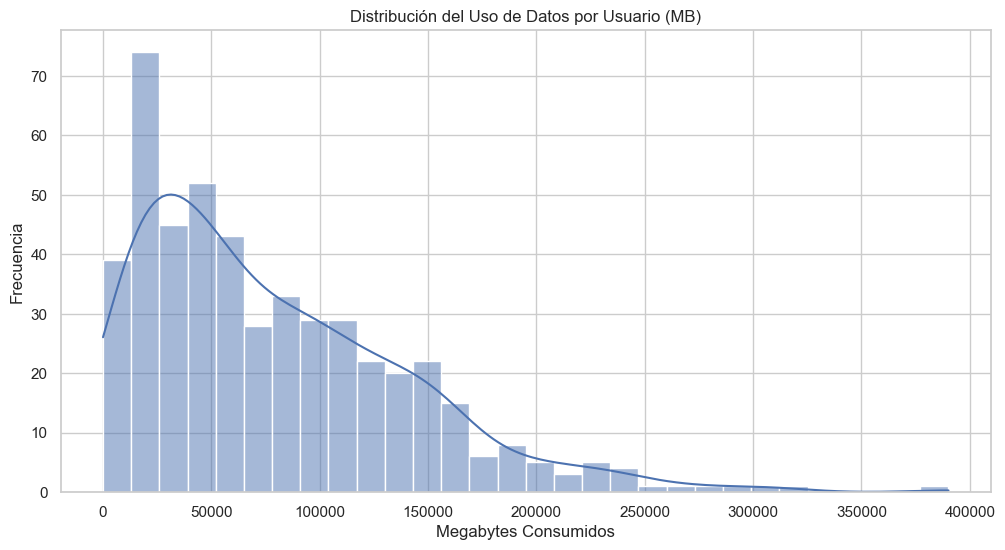

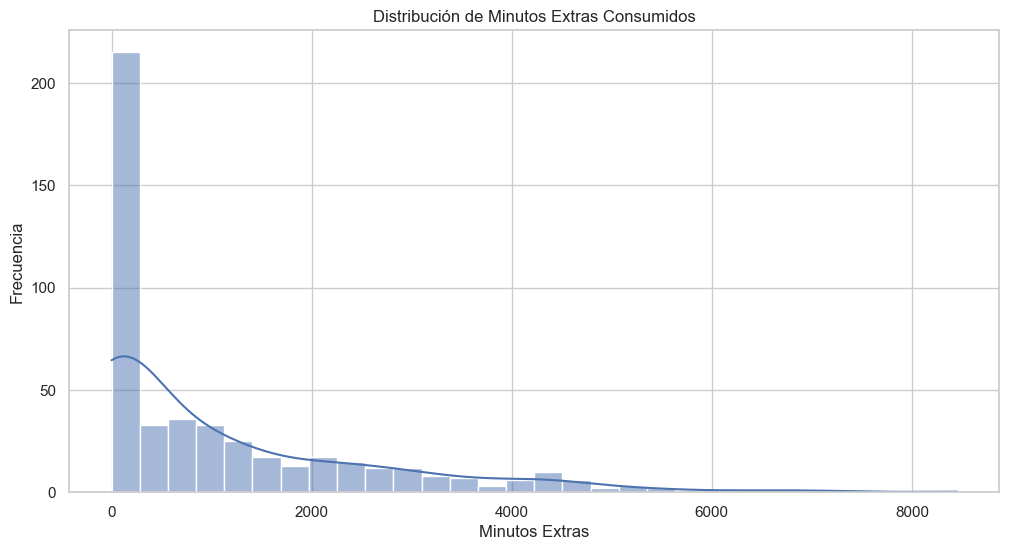

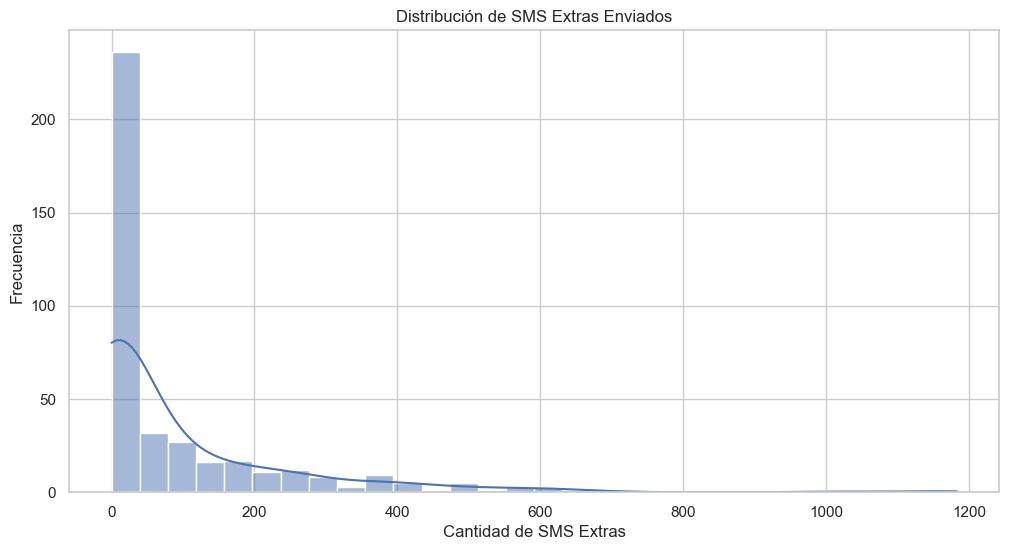

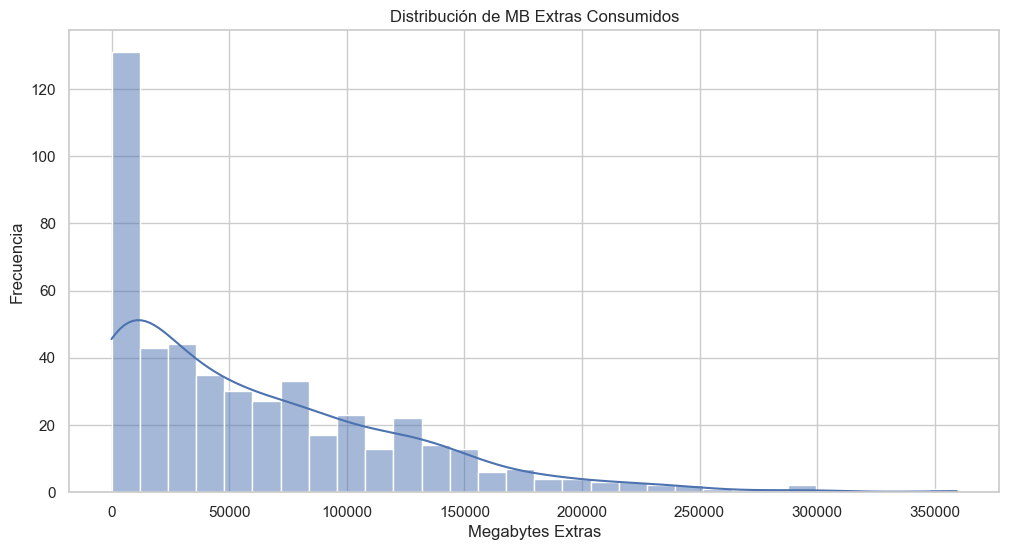


âœ… AnÃ¡lisis Exploratorio de Datos (EDA) extendido completado.


In [7]:
# ðŸ“Œ Importar librerÃ­as necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ðŸ“Œ ConfiguraciÃ³n de visualizaciÃ³n
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ðŸ“Œ Ruta de los archivos CSV en la carpeta "raw"
raw_path = "C:/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Examanes/Proyecto_Megaline/data/raw/"

# ðŸ“Œ Cargar los datasets
df_users = pd.read_csv(raw_path + "megaline_users.csv")
df_calls = pd.read_csv(raw_path + "megaline_calls.csv")
df_sms = pd.read_csv(raw_path + "megaline_messages.csv")
df_internet = pd.read_csv(raw_path + "megaline_internet.csv")
df_plans = pd.read_csv(raw_path + "megaline_plans.csv")

# ðŸ”¹ Unir informaciÃ³n de planes con usuarios
df_users = df_users.merge(df_plans, left_on="plan", right_on="plan_name", how="left")

# ðŸ“Œ Revisar la distribuciÃ³n del consumo de llamadas
plt.figure()
sns.histplot(df_calls["duration"], bins=30, kde=True)
plt.title("DistribuciÃ³n de DuraciÃ³n de Llamadas")
plt.xlabel("Minutos")
plt.ylabel("Frecuencia")
plt.show()

# ðŸ“Œ Revisar la cantidad de SMS enviados por usuario
sms_counts = df_sms.groupby("user_id").size()
plt.figure()
sns.histplot(sms_counts, bins=30, kde=True)
plt.title("DistribuciÃ³n de Cantidad de SMS por Usuario")
plt.xlabel("Cantidad de SMS")
plt.ylabel("Frecuencia")
plt.show()

# ðŸ“Œ Revisar la cantidad de datos consumidos por usuario
data_usage = df_internet.groupby("user_id")["mb_used"].sum()
plt.figure()
sns.histplot(data_usage, bins=30, kde=True)
plt.title("DistribuciÃ³n del Uso de Datos por Usuario (MB)")
plt.xlabel("Megabytes Consumidos")
plt.ylabel("Frecuencia")
plt.show()

# ðŸ”¹ Usuarios que exceden los lÃ­mites de su plan
df_usage = df_calls.groupby("user_id")["duration"].sum().reset_index()
df_usage = df_usage.merge(df_sms.groupby("user_id").size().reset_index(name="sms_count"), on="user_id", how="left")
df_usage = df_usage.merge(df_internet.groupby("user_id")["mb_used"].sum().reset_index(), on="user_id", how="left")
df_usage = df_usage.merge(df_users[["user_id", "minutes_included", "messages_included", "mb_per_month_included"]], on="user_id", how="left")

# ðŸ“Œ Identificar quÃ© usuarios exceden su plan
df_usage["exceso_minutos"] = df_usage["duration"] - df_usage["minutes_included"]
df_usage["exceso_sms"] = df_usage["sms_count"] - df_usage["messages_included"]
df_usage["exceso_mb"] = df_usage["mb_used"] - df_usage["mb_per_month_included"]

# Reemplazar valores negativos con 0 (los que no excedieron el lÃ­mite)
df_usage[["exceso_minutos", "exceso_sms", "exceso_mb"]] = df_usage[["exceso_minutos", "exceso_sms", "exceso_mb"]].clip(lower=0)

# ðŸ“Œ Visualizar cuÃ¡ntos usuarios exceden sus planes
plt.figure()
sns.histplot(df_usage["exceso_minutos"], bins=30, kde=True)
plt.title("DistribuciÃ³n de Minutos Extras Consumidos")
plt.xlabel("Minutos Extras")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
sns.histplot(df_usage["exceso_sms"], bins=30, kde=True)
plt.title("DistribuciÃ³n de SMS Extras Enviados")
plt.xlabel("Cantidad de SMS Extras")
plt.ylabel("Frecuencia")
plt.show()

plt.figure()
sns.histplot(df_usage["exceso_mb"], bins=30, kde=True)
plt.title("DistribuciÃ³n de MB Extras Consumidos")
plt.xlabel("Megabytes Extras")
plt.ylabel("Frecuencia")
plt.show()

# ðŸ“Œ Guardar el dataset con los excesos de consumo para anÃ¡lisis posterior
df_usage.to_csv("C:/Users/pmate/OneDrive - Universidad San Francisco de Quito/8 SEMESTRE/DataMining/Examanes/Proyecto_Megaline/data/clean/usuarios_consumo.csv", index=False)

print("\nâœ… AnÃ¡lisis Exploratorio de Datos (EDA) extendido completado.")


In [8]:
# En el anÃ¡lisis exploratorio de datos (EDA) encontramos que los usuarios tienen entre 18 y 75 aÃ±os, 
# con una mediana de 45 aÃ±os, y estÃ¡n distribuidos en 73 ciudades, predominando en New York, Los Angeles y Dallas. 
# La mayorÃ­a usa el plan Surf ($20), mientras que el plan Ultimate ($70) tiene menos clientes. 
# En llamadas, la duraciÃ³n promedio es 6.7 minutos, con muchas llamadas cortas y algunos casos extremos de hasta 37.6 minutos. 
# El uso de SMS es desigual, con algunos usuarios enviando mÃ¡s de 1,200 mensajes al mes. 
# En datos, el consumo varÃ­a ampliamente, con usuarios que superan los 300GB mensuales. 
# Identificamos que muchos clientes pagan costos adicionales por exceder los lÃ­mites de su plan, 
# especialmente en datos y, en menor medida, en minutos y SMS. Esto indica que el plan Ultimate podrÃ­a ser 
# mÃ¡s rentable para heavy users. El siguiente paso es Data Wrangling, donde limpiaremos los datos y 
# calcularemos los costos totales de cada usuario.
